In [117]:
from io import BytesIO
from zipfile import ZipFile
import requests, zipfile
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Question 1: Load
* Structure: there are 641914 records, and 29 columns. Among the 29 columns, 3 are boolean, 4 are date time, 9 are float, 6 are integer, and 7 are categorical
* Assumption: empty string in a field means it is missing value

## Download data

In [150]:
def download_zip_from_url(zip_file_url):
    '''
    Downloads zipped data from given url and returns a zip file object
    Input: Url of data source
    Output: zipped file object
    ''' 
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    return z 

In [173]:
# Step 1: download data
#z = download_zip_from_url('https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip')

# Step 2: extract data
#z.extractall()

# Step 3: read data and display column names
#filename = z.namelist()[0]
filename = 'transactions.txt'
data = pd.read_json(filename, lines = True)
print(data.columns)

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')


In [174]:
# Step 4: sort the data according to account number and transaction time
data = data.sort_values(by = ['accountNumber', 'transactionDateTime'])

# Step 5: check a sample of data 
data.head(10)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
583485,100547107,2011-10-30,US,2500.00,786,1222,True,2500,0.00,02/2030,100547107,2011-10-30,,786,False,False,fastfood,,US,Popeyes #414406,,,01,09,,,64.66,2016-01-02T01:47:46,PURCHASE
583486,100547107,2011-10-30,US,2435.34,786,1222,True,2500,64.66,01/2023,100547107,2011-10-30,,786,False,False,fastfood,,US,Popeyes #700785,,,01,80,,,5.31,2016-01-16T23:35:41,PURCHASE
583487,100547107,2011-10-30,US,2430.03,786,1222,True,2500,69.97,06/2029,100547107,2011-10-30,,786,False,False,fastfood,,US,Arbys #46046,,,01,02,,,204.23,2016-01-17T21:50:04,PURCHASE
583488,100547107,2011-10-30,US,2225.80,786,1222,True,2500,274.20,12/2020,100547107,2011-10-30,,786,False,False,fastfood,,US,Shake Shack #968081,,,08,05,,,155.28,2016-01-29T05:19:50,PURCHASE
583489,100547107,2011-10-30,US,2070.52,786,1222,True,2500,429.48,01/2027,100547107,2011-10-30,,786,False,False,fastfood,,US,In-N-Out #27394,,,01,09,,,91.14,2016-01-30T20:49:10,PURCHASE
583490,100547107,2011-10-30,US,2500.00,786,1222,True,2500,0.00,02/2022,100547107,2011-10-30,,786,False,False,fastfood,,US,Quizno's #205329,,,01,02,,,2.80,2016-02-06T22:31:44,PURCHASE
583491,100547107,2011-10-30,US,2497.20,786,1222,True,2500,2.80,07/2024,100547107,2011-10-30,,786,False,False,fastfood,,US,Domino's Pizza #962710,,,01,05,,,119.77,2016-02-10T06:48:23,PURCHASE
583492,100547107,2011-10-30,US,2377.43,786,1222,True,2500,122.57,01/2027,100547107,2011-10-30,,786,False,False,fastfood,,US,Domino's Pizza #660134,,,01,05,,,211.11,2016-02-11T08:28:07,PURCHASE
583493,100547107,2011-10-30,US,2166.32,786,1222,True,2500,333.68,04/2026,100547107,2011-10-30,,786,False,False,fastfood,,US,Krispy Kreme #122012,,,01,09,,,66.23,2016-02-20T01:01:47,PURCHASE
583494,100547107,2011-10-30,US,2100.09,786,1222,True,2500,399.91,03/2022,100547107,2011-10-30,,786,False,False,fastfood,,US,Wendys #327348,,,01,02,,,1.06,2016-02-26T04:02:55,PURCHASE


In [175]:
# Step 6: change date time variable to appropriate data type
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'])
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])

# Step 7: notice from the sample data above that missing values are present as empty string
data = data.replace('', np.nan)

# Step 8: check structure of data
print('There are', data.shape[0], 'rows and', data.shape[1], 'columns.')

There are 641914 rows and 29 columns.


## Basic summary statistics

In [151]:
# Step 9: check missing values in each column
data.isnull().sum(axis = 0)

accountNumber                  0
accountOpenDate                0
acqCountry                  3913
availableMoney                 0
cardCVV                        0
cardLast4Digits                0
cardPresent                    0
creditLimit                    0
currentBalance                 0
currentExpDate                 0
customerId                     0
dateOfLastAddressChange        0
enteredCVV                     0
expirationDateKeyInMatch       0
isFraud                        0
merchantCategoryCode           0
merchantCountryCode          624
merchantName                   0
posConditionCode             287
posEntryMode                3345
transactionAmount              0
transactionDateTime            0
transactionType              589
time_diff                      0
multiSwipe                     0
dtype: int64

In [176]:
# Step 10: check data type and number of non-null values for each column
print(data.info())

# Columns with 0 non-null values are present, drop these columns where all values are missing
data = data.dropna(axis = 'columns', how = 'all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641914 entries, 583485 to 171056
Data columns (total 29 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  638001 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null int64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null datetime64[ns]
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null datetime64[ns]
echoBuffer                  0 non-null float64
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchan

In [112]:
# Step 11: check average, standard deviation, min, median, and maximum values for appropriate numeric columns
numerics = ['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']
data[numerics].describe()

,availableMoney,creditLimit,currentBalance,transactionAmount
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,6652.828573,10697.210608,4044.382035,135.162497
std,9227.132275,11460.359133,5945.510224,147.053302
min,-1244.930000,250.000000,0.000000,0.000000
25%,1114.970000,5000.000000,502.442500,32.320000
50%,3578.165000,7500.000000,2151.860000,85.800000
75%,8169.185000,15000.000000,5005.890000,189.030000
max,50000.000000,50000.000000,47496.500000,1825.250000


In [113]:
# Step 12: check time span for date time columns
data.describe(include = ['datetime64'])

,accountOpenDate,currentExpDate,dateOfLastAddressChange,transactionDateTime
count,641914,641914,641914,641914
unique,1826,165,2186,635472
top,2015-12-11 00:00:00,2026-05-01 00:00:00,2016-07-20 00:00:00,2016-02-13 12:23:26
freq,10137,4209,3948,3
first,1985-12-25 00:00:00,2018-05-01 00:00:00,1985-12-25 00:00:00,2016-01-01 00:00:37
last,2015-12-31 00:00:00,2032-01-01 00:00:00,2016-12-30 00:00:00,2016-12-30 23:59:27


In [114]:
# Step 13: check unique values and most-frequent value for categorical variables
data.describe(include = ['object'])

,acqCountry,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionType
count,638001,641914,641290,641914,641627,638569,641325
unique,4,19,4,2493,3,5,3
top,US,online_retail,US,Lyft,01,05,PURCHASE
freq,632303,161469,635577,25311,514144,255615,608685


In [116]:
# Step 14: check frequency of each unique value for categorical variables
categoricals = [x for x in data.columns if data[x].dtypes == np.object]

for var in categoricals:
    num_unique_values = data[var].nunique()
    
    print(var, 'has', num_unique_values, 'unique values.')
    if num_unique_values < 10:
        print(data[var].value_counts())
    print()

acqCountry has 4 unique values.
US     632303
MEX      2626
CAN      1870
PR       1202
Name: acqCountry, dtype: int64

merchantCategoryCode has 19 unique values.

merchantCountryCode has 4 unique values.
US     635577
MEX      2636
CAN      1874
PR       1203
Name: merchantCountryCode, dtype: int64

merchantName has 2493 unique values.

posConditionCode has 3 unique values.
01    514144
08    121507
99      5976
Name: posConditionCode, dtype: int64

posEntryMode has 5 unique values.
05    255615
09    193193
02    160589
90     16251
80     12921
Name: posEntryMode, dtype: int64

transactionType has 3 unique values.
PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64



# Question 2: Plot 
Findings:
* Transaction amount is right-skewed, with large value outliers. However, about 80% of transactions have a value of below 250 dollars
* Removing the top 2.5% and bottom 2.5% of transaction amount does not change the distribution of data dramatically

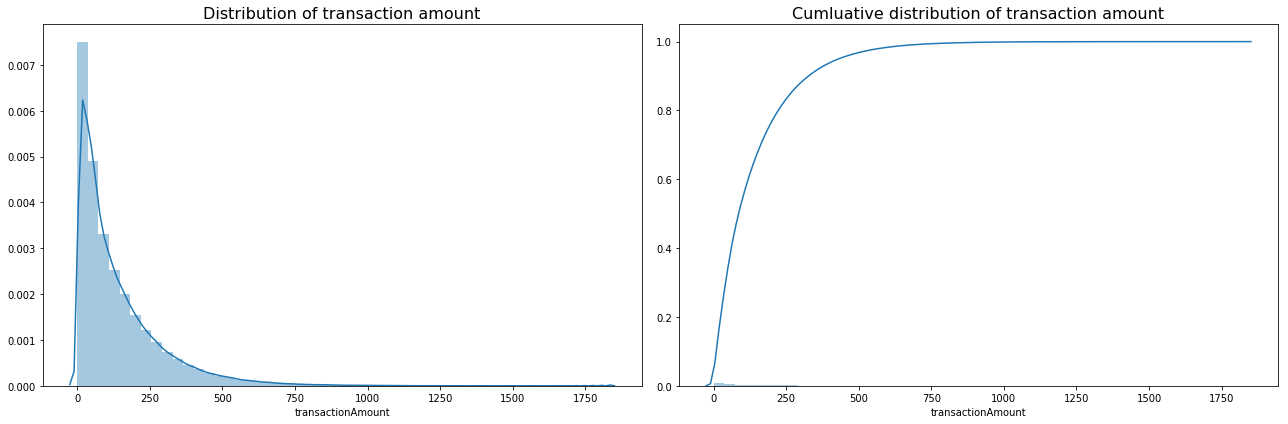

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.distplot(data['transactionAmount'] ,ax = ax[0])
ax[0].set_title('Distribution of transaction amount', fontsize = 16)

sns.distplot(data['transactionAmount'] ,kde_kws=dict(cumulative=True), ax = ax[1])
ax[1].set_title('Cumluative distribution of transaction amount', fontsize = 16)

plt.tight_layout()
plt.show()

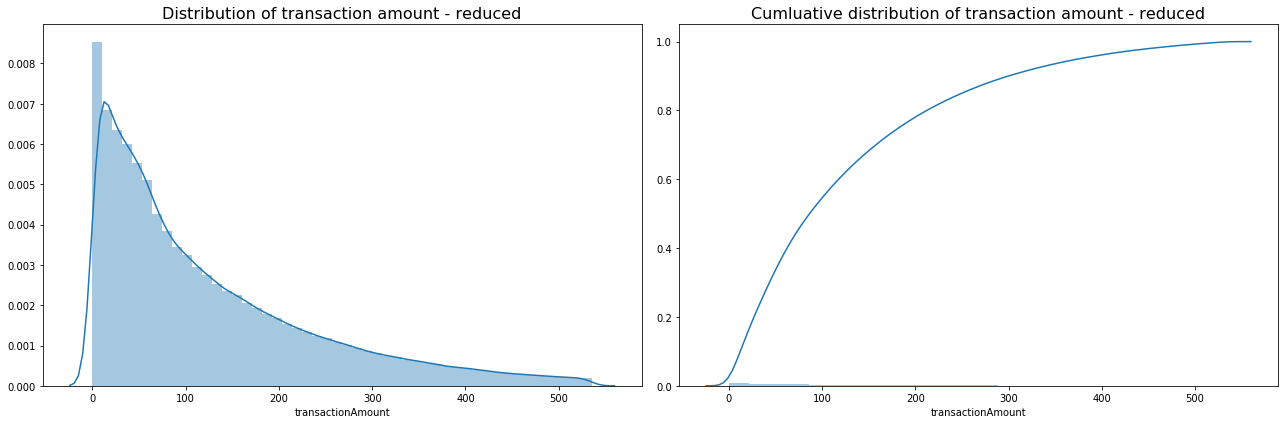

In [120]:
# Exclude top 2.5% and bottom 2.5% of the data to remove any potential outliers
data_reduced = data[(data['transactionAmount'] < data['transactionAmount'].quantile(.975)) & (data['transactionAmount'] > data['transactionAmount'].quantile(0.025))]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.distplot(data_reduced['transactionAmount'] ,ax = ax[0])
ax[0].set_title('Distribution of transaction amount - reduced', fontsize = 16)

sns.distplot(data_reduced['transactionAmount'] ,kde_kws=dict(cumulative=True), ax = ax[1])
ax[1].set_title('Cumluative distribution of transaction amount - reduced', fontsize = 16)

plt.tight_layout()
plt.show()

# Question 3: Data Wrangling - Duplicates Transactions
Definitions:
1.  **Reversed transactions** are those with a transaction type "REVERSAL"
2. **Multiple-swipe transactions** are transactions performed by same consumer, using the same card at the same merchant with same transaction amount and done more than once within 10 minutes

Findings:
1. There are 16162 transactions being marked as reversed transactions, or equivalently, 2.5% of all transactions. The total dollar amount of reversed transactions is \$2,242,915.1, which is 2.6% of all transactions.
2. Compared to non-reversed transactions, reversed transactions have higher average and median transaction dollar  amount
3. Card acquired at the US and accommodation and transportation expenses are more likely to be reversed transactions
4. There are 10598 transactions being marked as multipe swipe transactions, or equivalently, 1.7% of all transactions. The total dollar amount of multiple swipe transactions is \$1,540,642.54 which is 1.8% of all transactions.
5. Compared to non-multiple-swipe transactions, multiple-swipe transactions have higher average and median transaction dollar amount

### Reversed transactions

In [188]:
# Step 1: Reversed transactions identification
data['reversed'] = 0
data.loc[(data['transactionType'] == 'REVERSAL'), 'reversed'] = 1

num_reversed = data.loc[data['reversed'] == 1].shape[0]
dollar_amount_reversed = data.loc[data['reversed'] == 1]['transactionAmount'].sum()

print('There are', num_reversed, 'transactions being marked as reversed transactions, or equivalently,', \
      str(round(num_reversed/data.shape[0]*100, 1)) + '% of all transactions. \
      The total dollar amount of reversed transactions is', round(dollar_amount_reversed, 2), \
     'which is', str(round(dollar_amount_reversed
                           /data['transactionAmount'].sum()*100, 1)) + '% of all transactions.')

There are 16162 transactions being marked as reversed transactions, or equivalently, 2.5% of all transactions.       The total dollar amount of reversed transactions is 2242915.1 which is 2.6% of all transactions.


In [256]:
# Step 2: check average, standard deviation, min, median, and maximum values for appropriate numeric columns
numerics = ['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']
data.groupby(['reversed'])[numerics].agg(['mean', 'median'])

availableMoney             creditLimit        currentBalance  \
                   mean    median          mean median           mean   
reversed                                                                
0           6658.459930  3583.485  10693.722114   7500    4035.262184   
1           6434.796593  3389.365  10832.276327   7500    4397.479735   

                   transactionAmount         
            median              mean median  
reversed                                     
0         2144.730        135.069139  85.63  
1         2419.695        138.777076  91.28

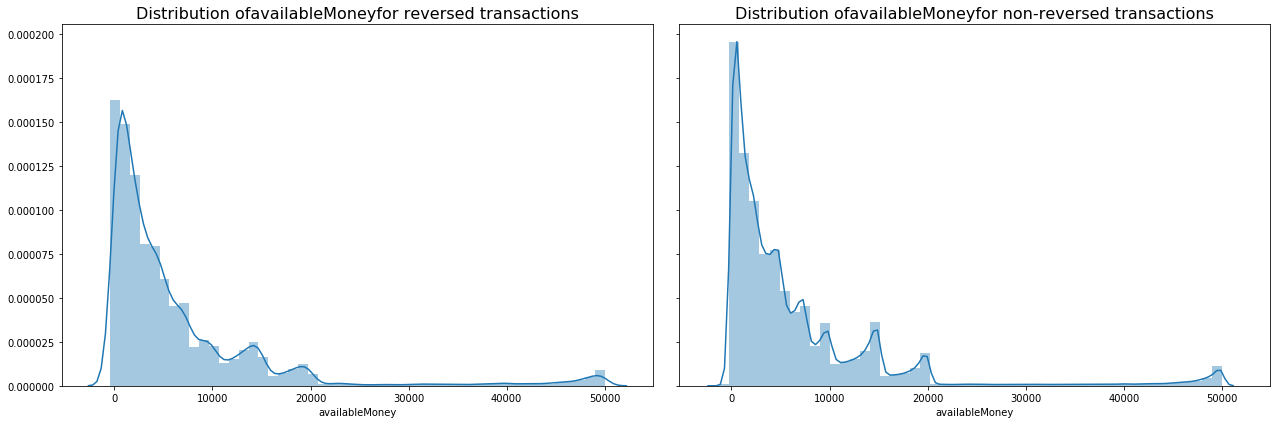

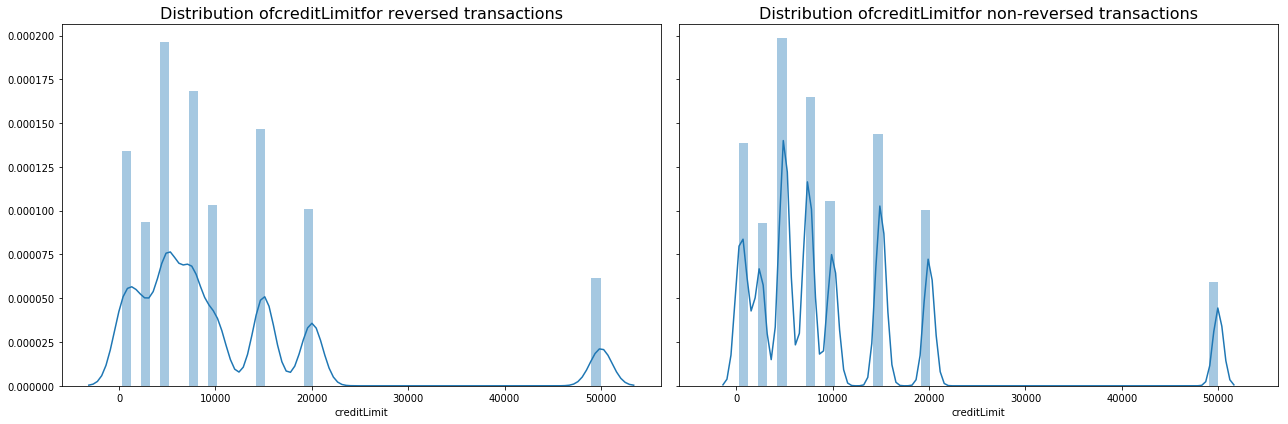

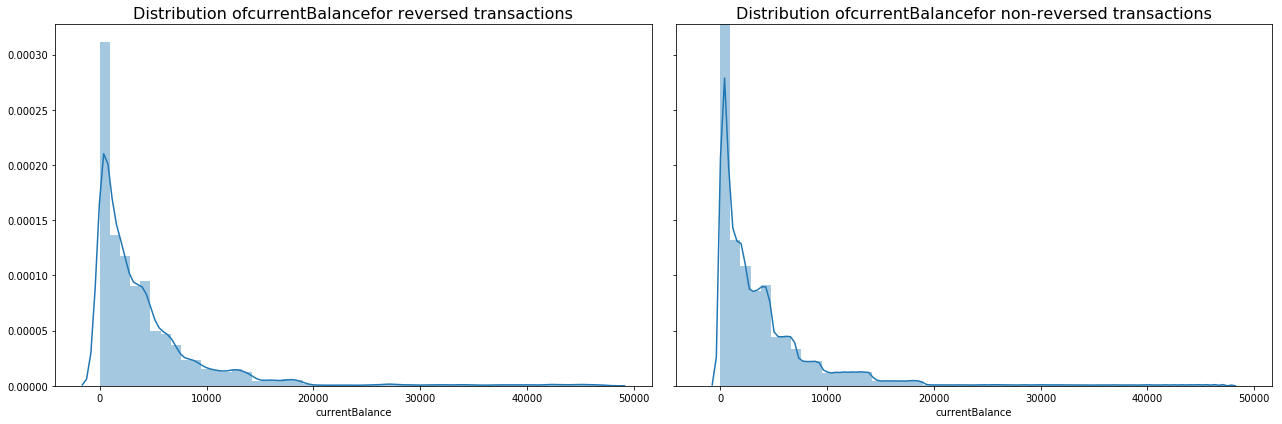

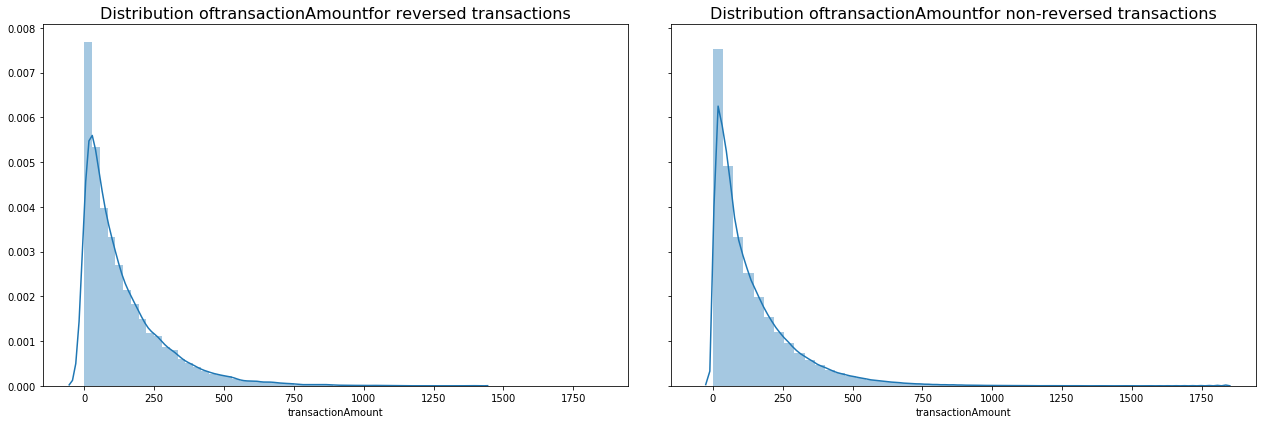

In [190]:
# Step 3: check visualzied distribution for reversed vs non-reversed transactions
for var in numerics:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey = True, sharex = True)

    sns.distplot(data[data['reversed']==1][var] ,ax = ax[0])
    plot_title = 'Distribution of' + var + 'for reversed transactions'
    ax[0].set_title(plot_title, fontsize = 16)
    
    sns.distplot(data[data['reversed']==0][var] ,ax = ax[1])
    plot_title = 'Distribution of' + var + 'for non-reversed transactions'
    ax[1].set_title(plot_title, fontsize = 16)

    plt.tight_layout()
    plt.show()

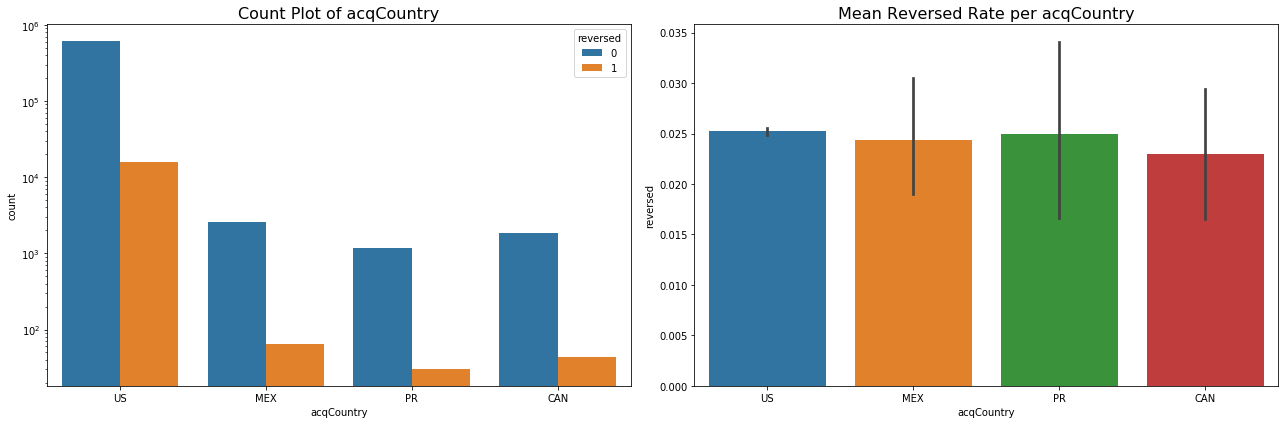

  acqCountry  reversed rate
3         US       0.025205
2         PR       0.024958
1        MEX       0.024372
0        CAN       0.022995


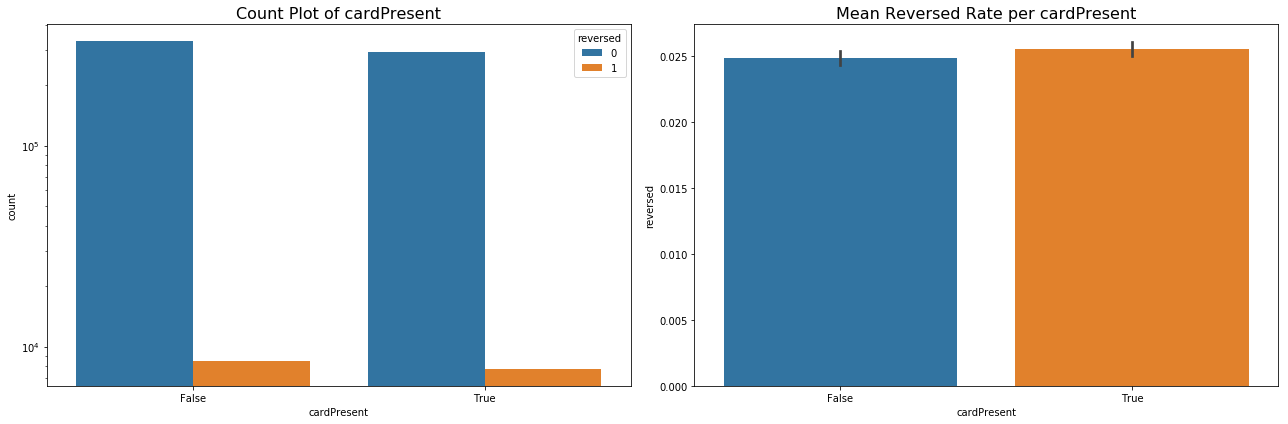

   cardPresent  reversed rate
1         True       0.025539
0        False       0.024858


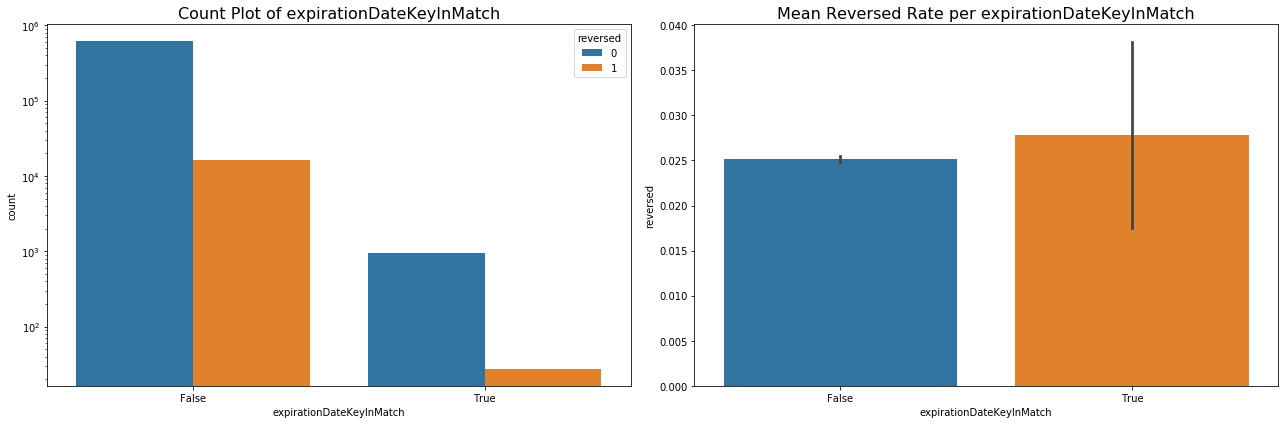

   expirationDateKeyInMatch  reversed rate
1                      True       0.027864
0                     False       0.025174


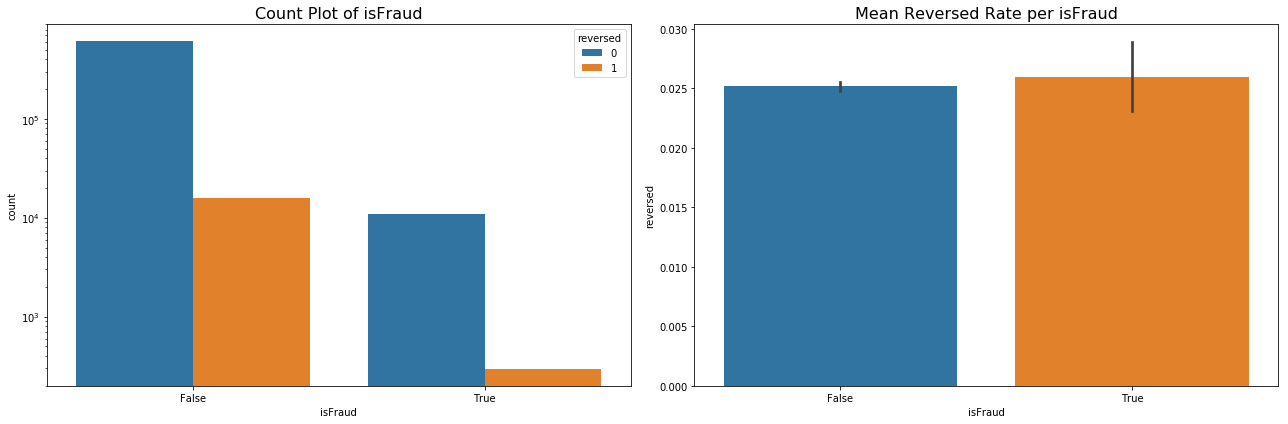

   isFraud  reversed rate
1     True       0.025925
0    False       0.025164
   merchantCategoryCode  reversed rate
0               airline       0.029429
11               hotels       0.028673
1                  auto       0.028580
10               health       0.028235
13         online_gifts       0.028143
3         entertainment       0.027872
17            rideshare       0.027643
14        online_retail       0.027621
16        personal care       0.027546
4              fastfood       0.027511


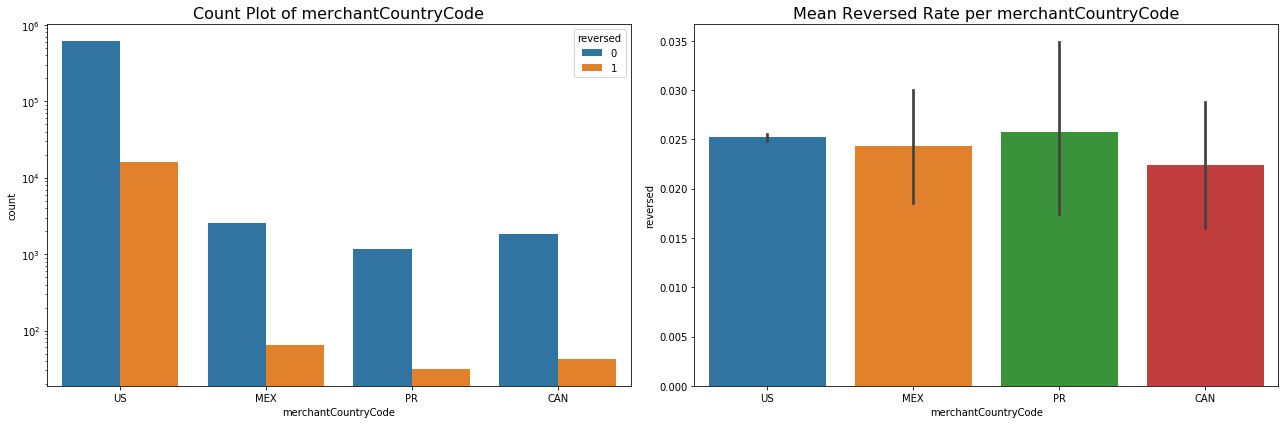

  merchantCountryCode  reversed rate
2                  PR       0.025769
3                  US       0.025196
1                 MEX       0.024279
0                 CAN       0.022412
              merchantName  reversed rate
2181           WSC #392958       0.142857
2170           WSC #264919       0.136364
1173          NYSC #601170       0.125000
2341     Walgreens #951810       0.120000
1393  Powerlifting #293339       0.115385
2279     Walgreens #348717       0.115385
2208           WSC #612041       0.115385
2199           WSC #502956       0.111111
1426  Powerlifting #675142       0.111111
669      Golds Gym #837214       0.111111


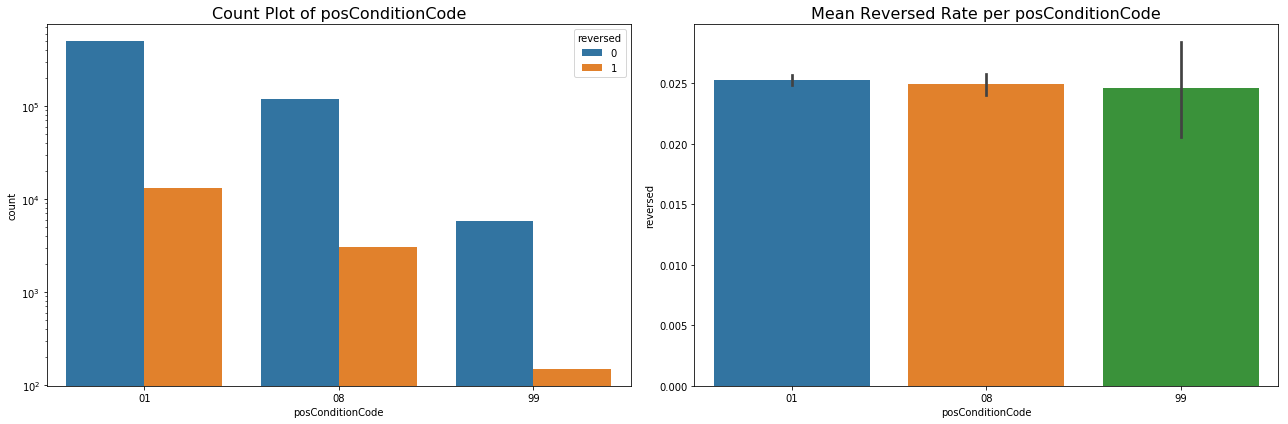

  posConditionCode  reversed rate
0               01       0.025248
1               08       0.024929
2               99       0.024598
  posEntryMode  reversed rate
3           80       0.025385
1           05       0.025319
2           09       0.025229
0           02       0.025058
4           90       0.023752


In [248]:
# Step 4: Visualizations of reversal rate by categorical and boolean variables
categoricals = [x for x in data.columns if data[x].dtypes in (np.object, np.bool) and x != 'transactionType']

for var in categoricals:
    num_unique_values = data[var].nunique()
    
    if num_unique_values  < 5:
        

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
        sns.countplot(x=var, hue='reversed', data=data, ax=ax[0])
        plot_title = 'Count Plot of ' + str(var)
        ax[0].set_title(plot_title, fontsize=16)
        ax[0].set_yscale('log')
        
        sns.barplot(x = var, y='reversed', data=data, ax=ax[1])
        plot_title = 'Mean Reversed Rate per '  + str(var)
        ax[1].set_title(plot_title, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        grouped = data[[var, 'reversed']].groupby(var).mean().reset_index()
        grouped.rename(columns = {'reversed': 'reversed rate'}, inplace = True)
        print(grouped.sort_values(by = 'reversed rate', ascending=False))
        print()
    else:
        grouped = data[[var, 'reversed']].groupby(var).mean().reset_index()
        grouped.rename(columns = {'reversed': 'reversed rate'}, inplace = True)
        print(grouped.sort_values(by = 'reversed rate', ascending=False).head(10))
        print()

### Multiple swipe transactions

In [252]:
# Step 1: multiple swipe transactions identification
data = data.sort_values(by = ['accountNumber', 'customerId', 'merchantName', 'transactionAmount', 'transactionDateTime'])
data['time_diff'] = data.groupby(['accountNumber', 'customerId', 'merchantName', 'transactionAmount'], as_index=False)['transactionDateTime'].transform(lambda x: x- x.iloc[0]) 

data['multiSwipe'] = 0
data.loc[(data['time_diff'] > datetime.timedelta(minutes = 0))
         & (data['time_diff'] < datetime.timedelta(minutes = 10)), 'multiSwipe'] = 1

num_multi = data.loc[data['multiSwipe'] == 1].shape[0]
dollar_amount_multi = data.loc[data['multiSwipe'] == 1]['transactionAmount'].sum()

print('There are', num_multi, 'transactions being marked as multipe swipe transactions, or equivalently,', \
      str(round(num_multi/data.shape[0]*100, 1)) + '% of all transactions. \
      The total dollar amount of multiple swipe transactions is', dollar_amount_multi, \
     'which is', str(round(dollar_amount_multi
                           /data['transactionAmount'].sum()*100, 1)) + '% of all transactions.')

There are 10598 transactions being marked as multipe swipe transactions, or equivalently, 1.7% of all transactions.       The total dollar amount of multiple swipe transactions is 1540642.54 which is 1.8% of all transactions.


In [253]:
# Step 2: check average, standard deviation, min, median, and maximum values for appropriate numeric columns
numerics = ['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']
data.groupby(['multiSwipe'])[numerics].agg(['mean', 'median'])

availableMoney            creditLimit        currentBalance  \
                     mean   median          mean median           mean   
multiSwipe                                                               
0             6655.960013  3579.86  10694.761815   7500    4038.801802   
1             6466.290698  3483.56  10843.083601   7500    4376.792902   

                    transactionAmount         
             median              mean median  
multiSwipe                                    
0           2149.36        134.991124  85.52  
1           2307.18        145.371064  99.79

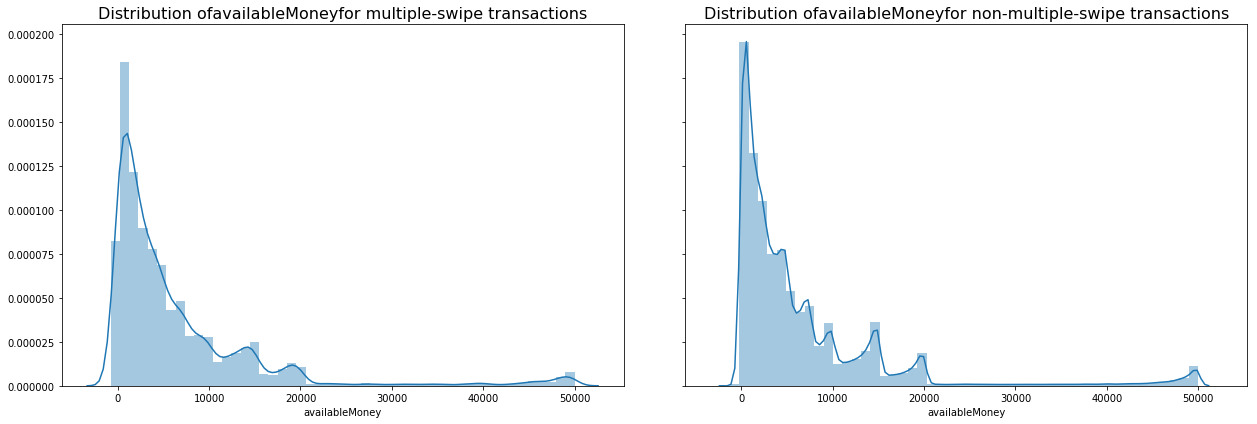

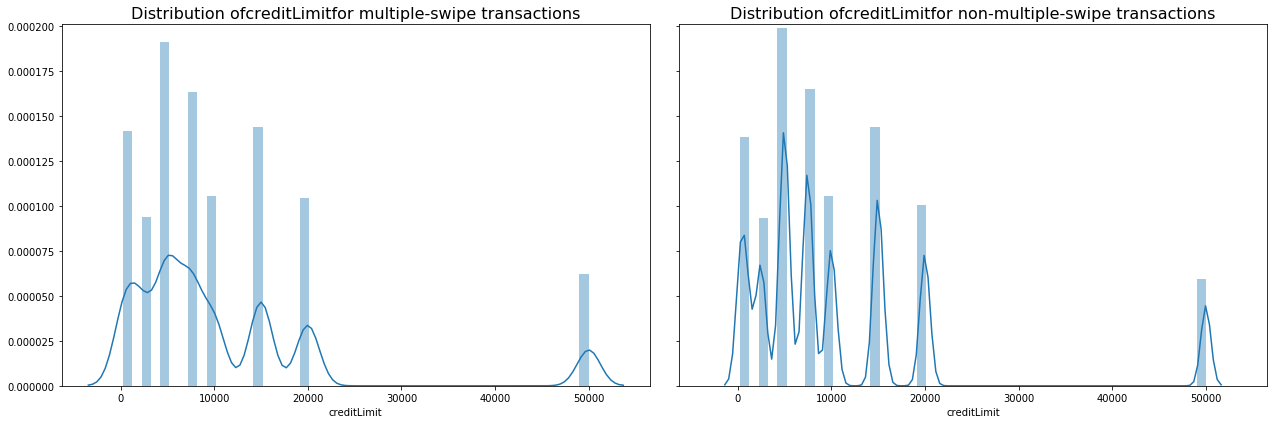

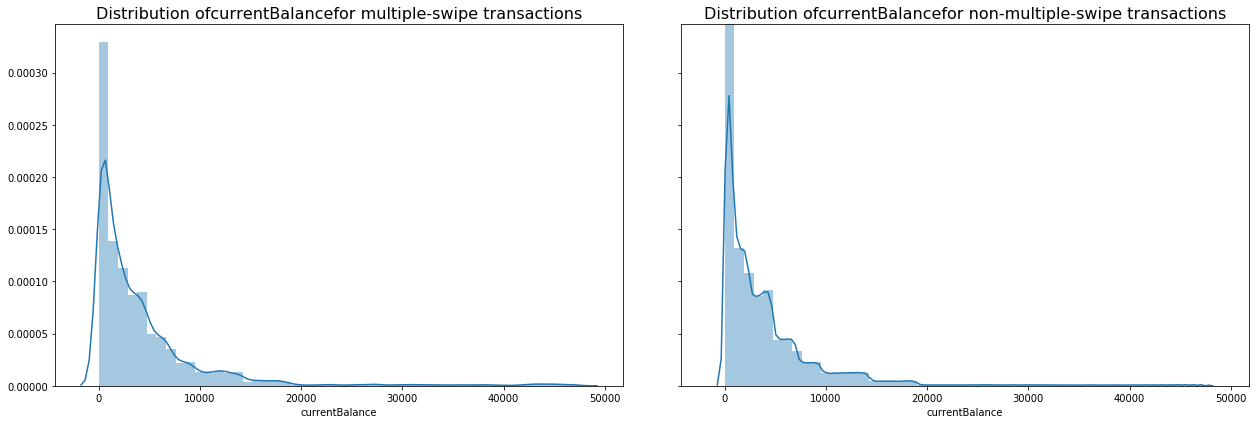

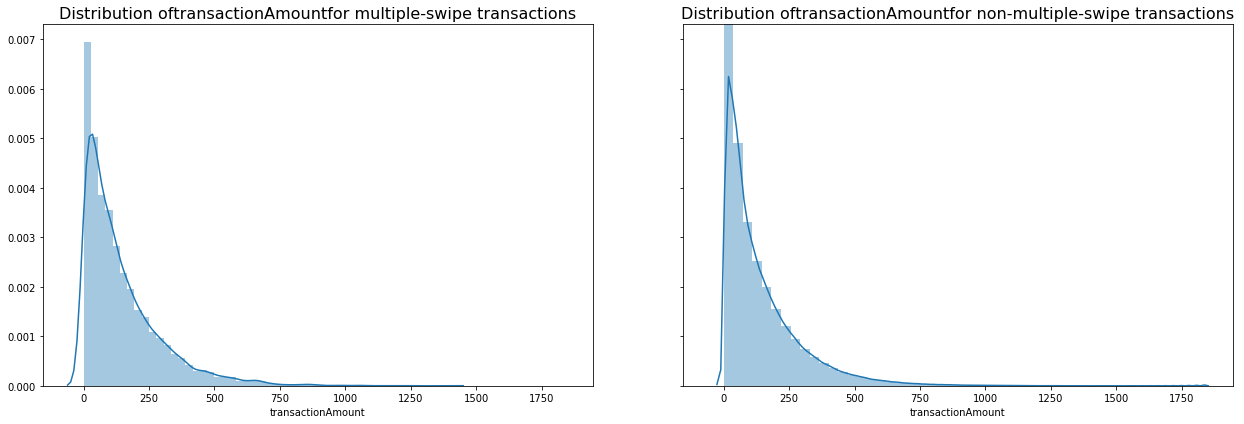

In [254]:
# Step 3: check visualzied distribution for multiple-swipe vs non-multiple-swipe transactions
for var in numerics:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey = True, sharex = True)

    sns.distplot(data[data['multiSwipe']==1][var] ,ax = ax[0])
    plot_title = 'Distribution of' + var + 'for multiple-swipe transactions'
    ax[0].set_title(plot_title, fontsize = 16)
    
    sns.distplot(data[data['multiSwipe']==0][var] ,ax = ax[1])
    plot_title = 'Distribution of' + var + 'for non-multiple-swipe transactions'
    ax[1].set_title(plot_title, fontsize = 16)

    plt.tight_layout()
    plt.show()

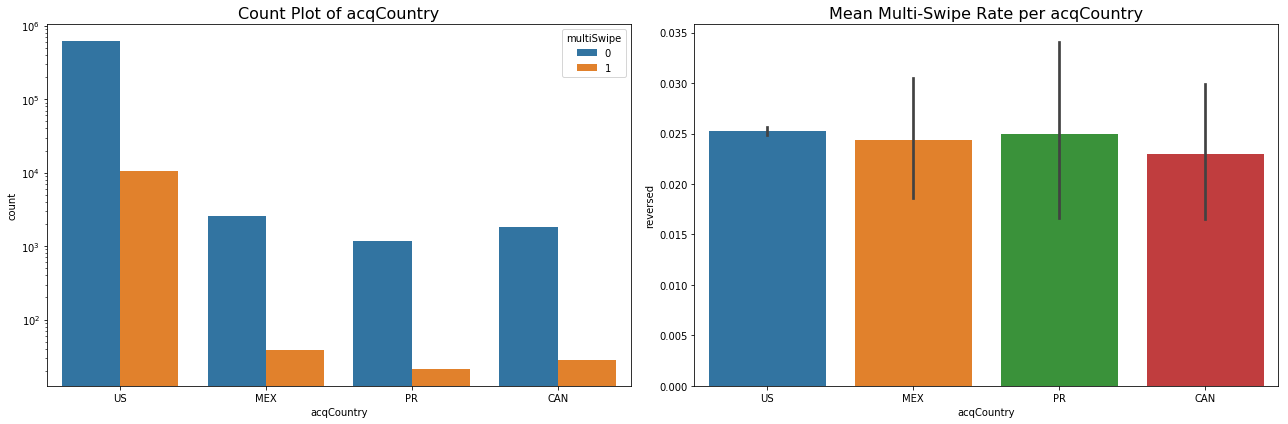

  acqCountry  multiple swipe rate
2         PR             0.017471
3         US             0.016519
0        CAN             0.014973
1        MEX             0.014851



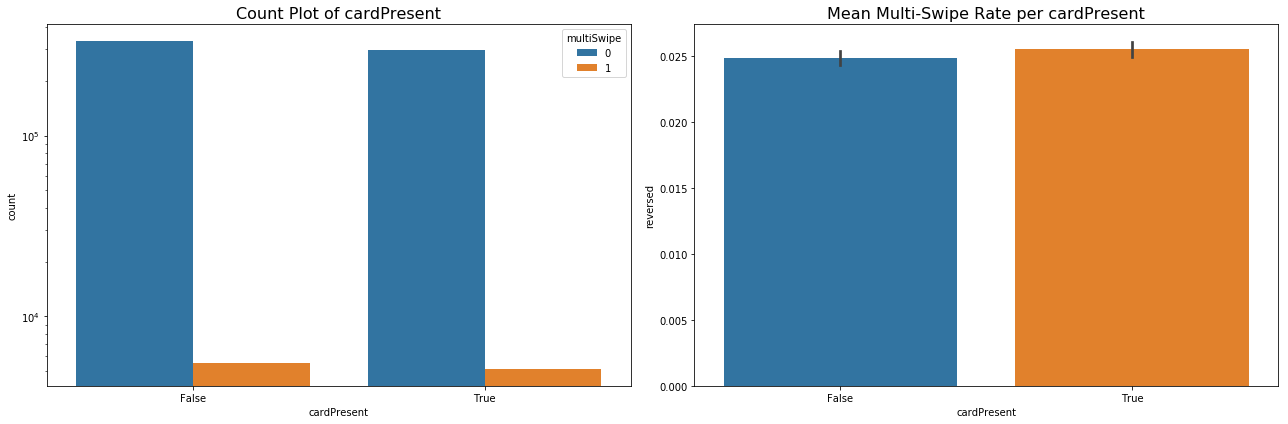

   cardPresent  multiple swipe rate
1         True             0.016855
0        False             0.016205



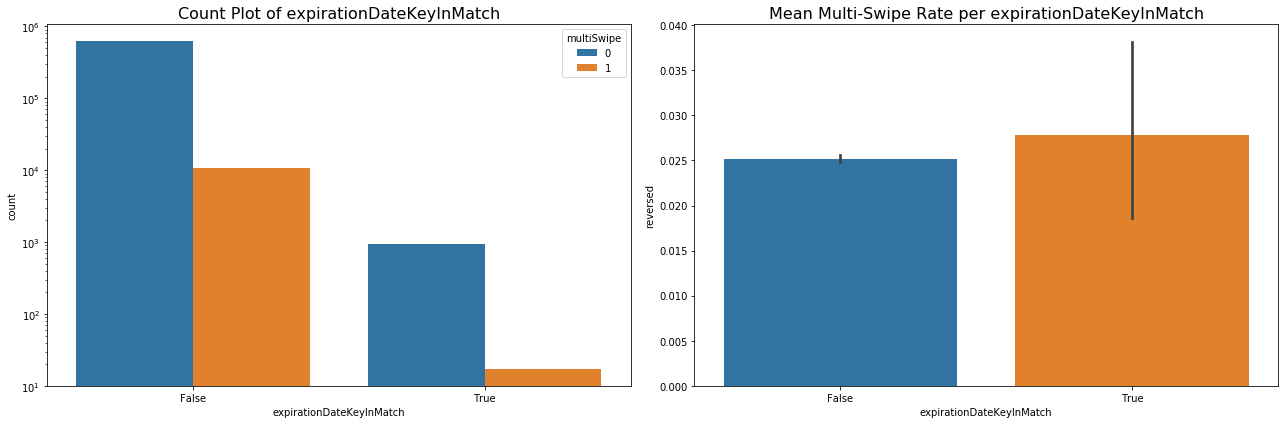

   expirationDateKeyInMatch  multiple swipe rate
1                      True             0.017544
0                     False             0.016508



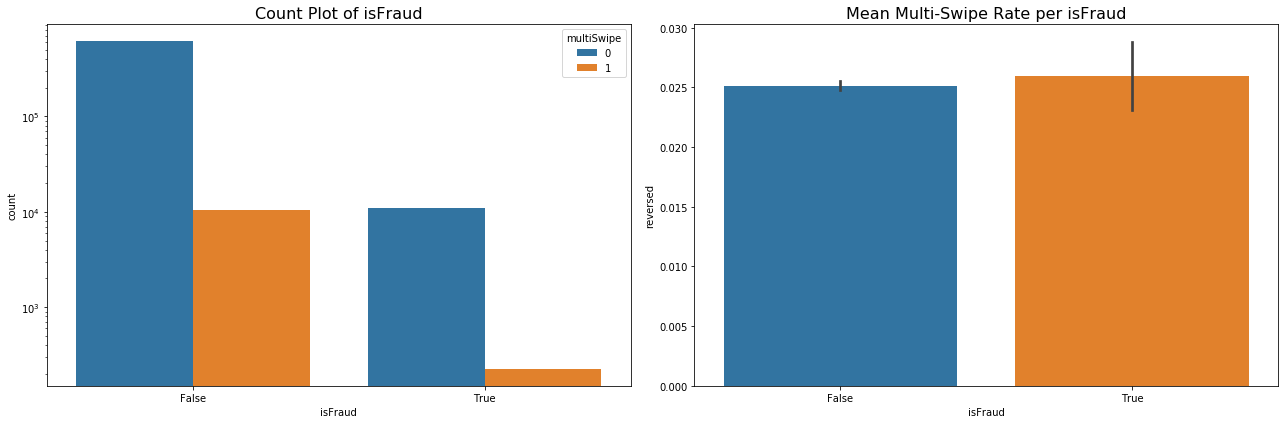

   isFraud  multiple swipe rate
1     True             0.019731
0    False             0.016452

   merchantCategoryCode  multiple swipe rate
0               airline             0.019219
8             furniture             0.019071
16        personal care             0.018975
1                  auto             0.018922
17            rideshare             0.018685
13         online_gifts             0.018369
3         entertainment             0.018253
11               hotels             0.018139
10               health             0.018056
4              fastfood             0.017985



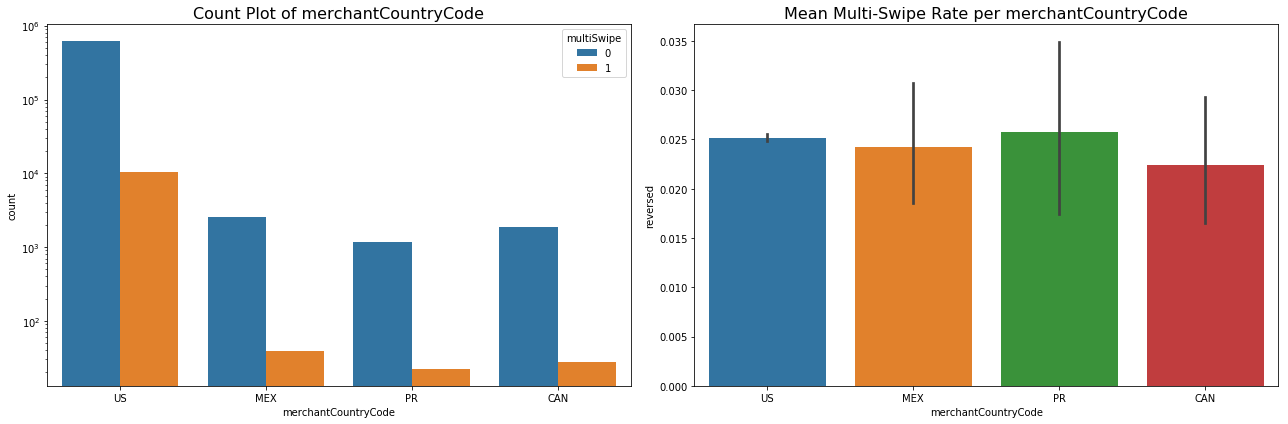

  merchantCountryCode  multiple swipe rate
2                  PR             0.018288
3                  US             0.016522
0                 CAN             0.014941
1                 MEX             0.014795

             merchantName  multiple swipe rate
1391  Powerlifting #26445             0.147059
2322    Walgreens #811259             0.129032
663     Golds Gym #747766             0.121212
271           CVS #618160             0.120000
2272    Walgreens #315691             0.107143
2299    Walgreens #555944             0.105263
1190         NYSC #832595             0.104167
666     Golds Gym #767313             0.100000
2324    Walgreens #842549             0.096774
616     Golds Gym #185635             0.095238



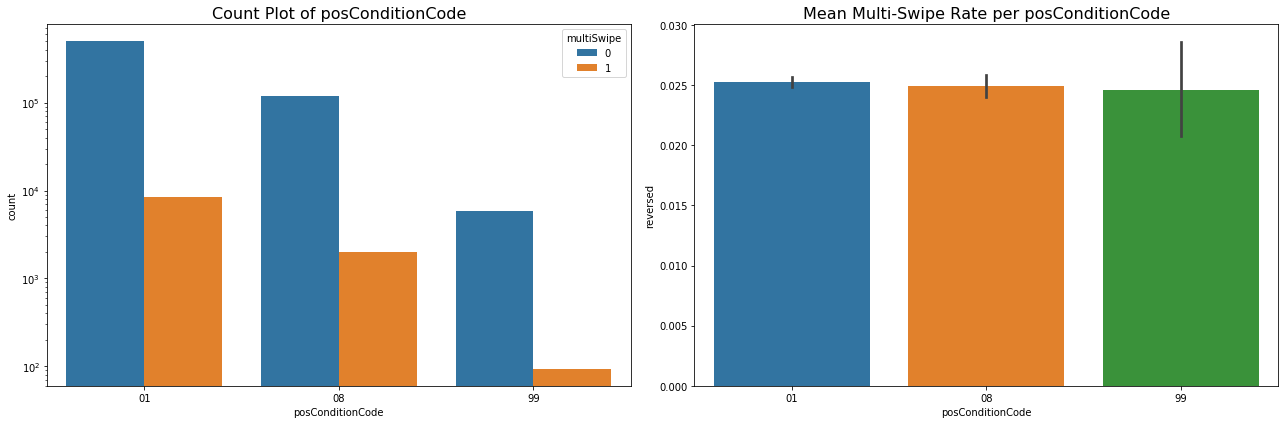

  posConditionCode  multiple swipe rate
0               01             0.016550
1               08             0.016402
2               99             0.015395

  posEntryMode  multiple swipe rate
4           90             0.016676
1           05             0.016599
2           09             0.016533
0           02             0.016464
3           80             0.015866



In [255]:
# Step 4: Visualizations of reversal rate by categorical and boolean variables
categoricals = [x for x in data.columns if data[x].dtypes in (np.object, np.bool) and x != 'transactionType']

for var in categoricals:
    num_unique_values = data[var].nunique()
    
    if num_unique_values  < 5:
        

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
        sns.countplot(x=var, hue='multiSwipe', data=data, ax=ax[0])
        plot_title = 'Count Plot of ' + str(var)
        ax[0].set_title(plot_title, fontsize=16)
        ax[0].set_yscale('log')
        
        sns.barplot(x = var, y='reversed', data=data, ax=ax[1])
        plot_title = 'Mean Multi-Swipe Rate per '  + str(var)
        ax[1].set_title(plot_title, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        grouped = data[[var, 'multiSwipe']].groupby(var).mean().reset_index()
        grouped.rename(columns = {'multiSwipe': 'multiple swipe rate'}, inplace = True)
        print(grouped.sort_values(by = 'multiple swipe rate', ascending=False))
        print()
    else:
        grouped = data[[var, 'multiSwipe']].groupby(var).mean().reset_index()
        grouped.rename(columns = {'multiSwipe': 'multiple swipe rate'}, inplace = True)
        print(grouped.sort_values(by = 'multiple swipe rate', ascending=False).head(10))
        print()

# Question 4: Model

In [155]:
data1 = data.drop(['currentExpDate','dateOfLastAddressChange',\
                       'accountNumber', 'cardCVV','cardLast4Digits', \
                       'enteredCVV', 'currentBalance','merchantCountryCode','transactionDateTime'],axis=1)

In [156]:
data1.columns

Index(['accountOpenDate', 'acqCountry', 'availableMoney', 'cardPresent',
       'creditLimit', 'customerId', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantName', 'posConditionCode',
       'posEntryMode', 'transactionAmount', 'transactionType', 'time_diff',
       'multiSwipe'],
      dtype='object')

In [158]:
data1['CVV_ind'] = (data['enteredCVV'] == data['cardCVV']).astype(int)


In [ ]:
def feature_engineer(data):
    attributes = ['accountOpenDate', 'acqCountry', 'availableMoney', 'cardPresent', \
       'creditLimit', 'customerId', 'expirationDateKeyInMatch', 'isFraud', \
       'merchantCategoryCode', 'merchantName', 'posConditionCode', \
       'posEntryMode', 'transactionAmount', 'transactionType', 'time_diff', \
       'multiSwipe']
    data1 = data[attributes]
    
    data1['CVV_ind'] = (data['enteredCVV'] == data['cardCVV']).astype(int)
    
    data1['Country_ind'] = (data['acqCountry'] == data['merchantCountryCode']).astype(int)

    data1['OTB_sign'] = (data['availableMoney'] >= 0).astype(int)

    data1['OTB_ratio'] = data['availableMoney'] / data['creditLimit']
    
    data1['transaction_ratio'] = data['transactionAmount']/ data['availableMoney']
    
    data1 = pd.get_dummies(data1, columns=['acqCountry','cardPresent','expirationDateKeyInMatch',
                                           'transactionType', 'posConditionCode', 'posEntryMode',
                                           'merchantCategoryCode'])
#     m1 = {'cable/phone': '1', 
#          'food_delivery': '1', 
#          'fuel': '1', 
#          'gym': '1',
#          'mobileapps': '1',
#          'online_subscriptions': '1',
#           'airline': '2',
#           'auto': '2',
#           'fastfood': '2',
#           'food': '2',
#           'online_gifts': '2',
#           'health': '2',
#           'online_retail': '2',
#           'rideshare': '2',
#           'hotels': '3',
#           'entertainment': '4',
#           'furniture': '4',
#           'personal care': '4',
#           'subscriptions': '4'
#          }

#     data1['merchantCategoryCode_category'] = data['merchantCategoryCode'].map(m1)
    treshold = 0.04
    mct_data = pd.DataFrame(data.groupby('merchantName').apply(lambda x: sum(x.isFraud == 1) / len(x)))
    mct_data.reset_index(inplace=True)
    mct_data.columns = ['merchantName', 'ratio']


    s1 = set(mct_data.loc[mct_data['ratio'] < 0.000001, 'merchantName'])
    s2 = set(mct_data.loc[(mct_data['ratio'] >= 0.000001)&(mct_data['ratio'] < treshold), 'merchantName'])
    s3 = set(mct_data.loc[mct_data['ratio'] >= treshold, 'merchantName'])

    data1['merchantNameCode'] = 0
    data1.loc[data1['merchantName'].isin(s1), 'merchantNameCode'] = 0
    data1.loc[data1['merchantName'].isin(s2), 'merchantNameCode'] = 1
    data1.loc[data1['merchantName'].isin(s3), 'merchantNameCode'] = 2

    data1.drop('merchantName', axis=1, inplace=True)

    data1['tenure'] = data1['accountOpenDate'].apply(lambda x: 2019 - int(x[:4]))
    data1.drop('accountOpenDate', axis=1, inplace=True)

    data1 = pd.get_dummies(data1, columns=['merchantNameCode'])

    return data1

In [130]:
#  Change fraud indicator to integer 
data['isFraud'] = data['isFraud'].astype(int)

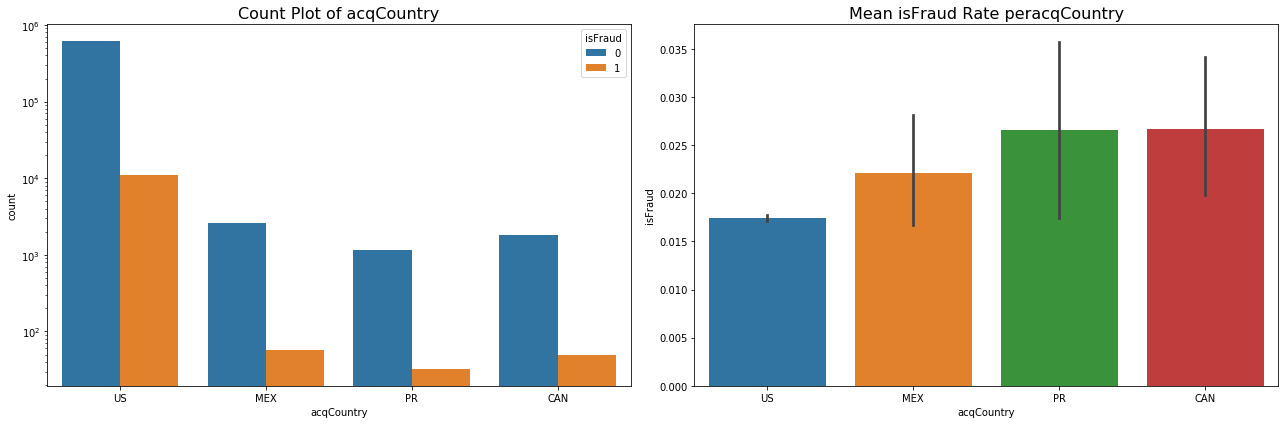

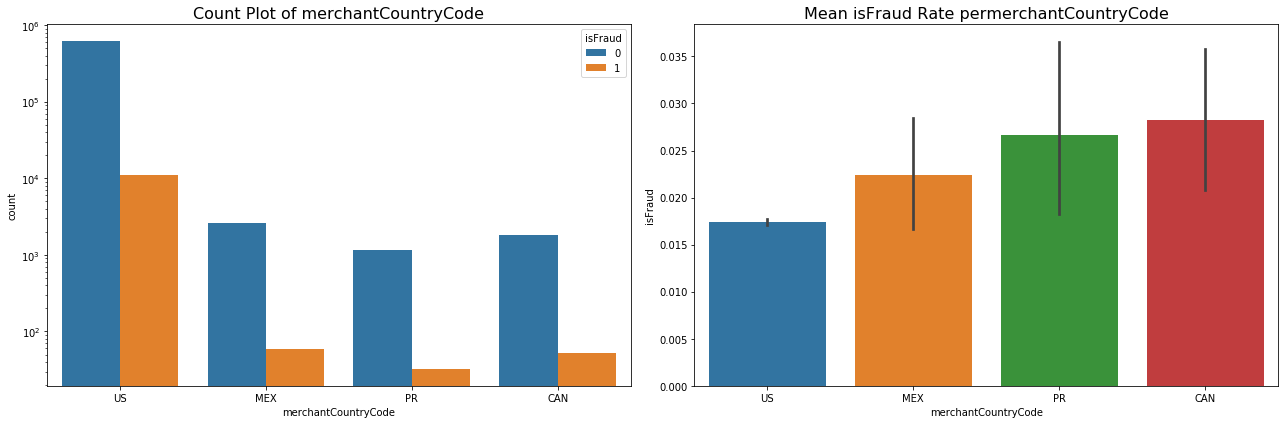

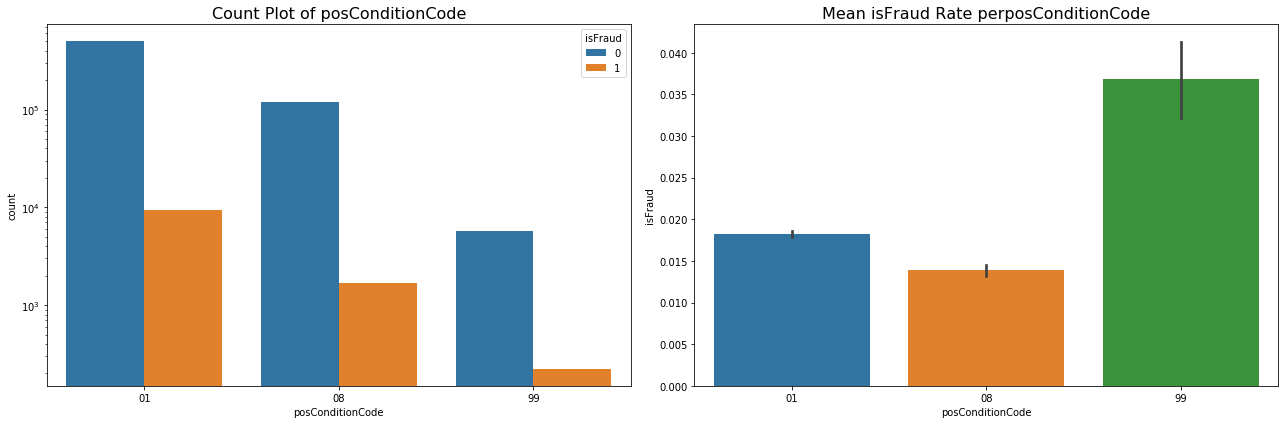

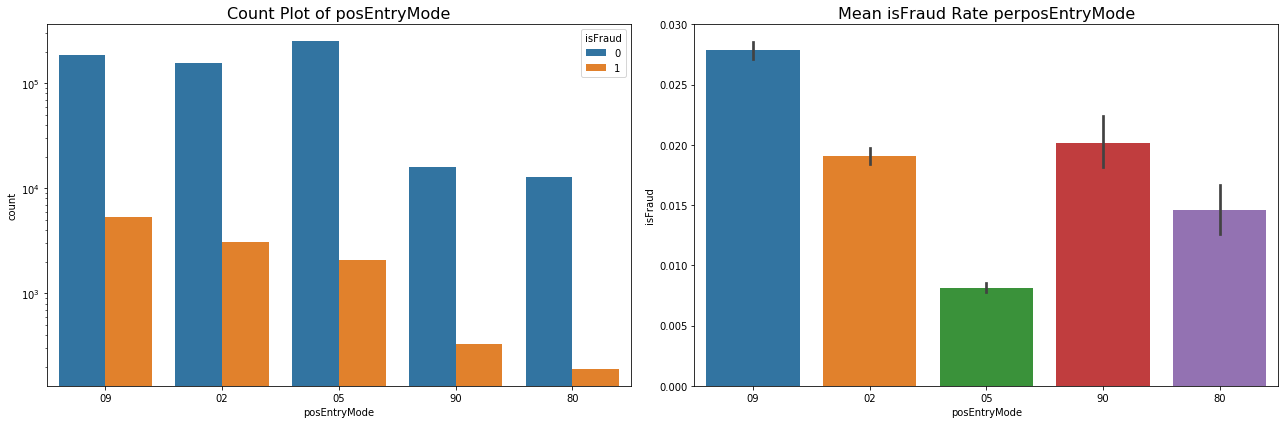

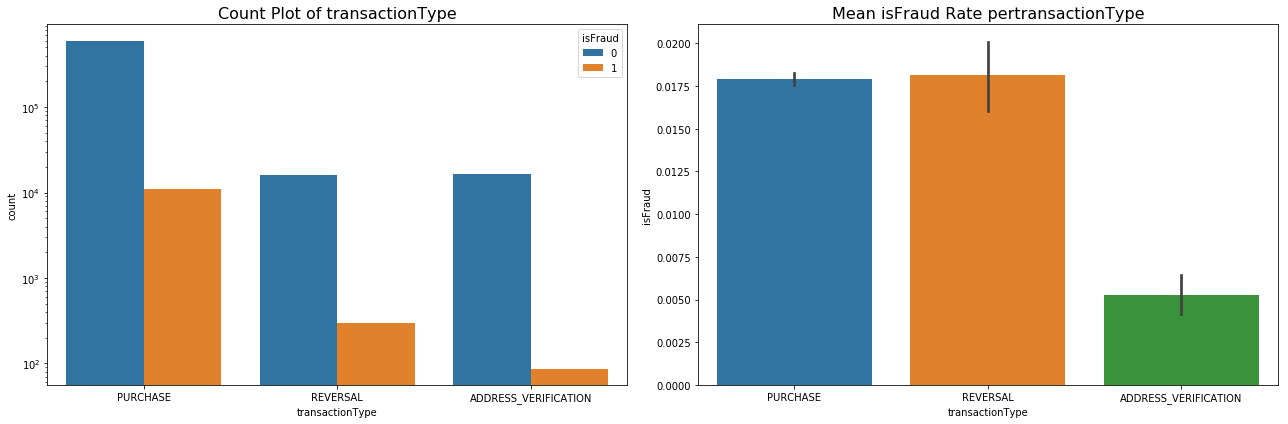

In [131]:
# Visualizations of categorical variables
categoricals = [x for x in data.columns if data[x].dtypes == np.object]

for var in categoricals:
    num_unique_values = data[var].nunique()
    
    if num_unique_values < 10:
        grouped = data[[var, 'isFraud']].groupby(var).mean().reset_index()

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
        sns.countplot(x=var, hue='isFraud', data=data, ax=ax[0])
        plot_title = 'Count Plot of ' + str(var)
        ax[0].set_title(plot_title, fontsize=16)
        ax[0].set_yscale('log')
        sns.barplot(x = var, y='isFraud', data=data, ax=ax[1])
        plot_title = 'Mean isFraud Rate per'  + str(var)
        ax[1].set_title(plot_title, fontsize=16)
        plt.tight_layout()
        plt.show()

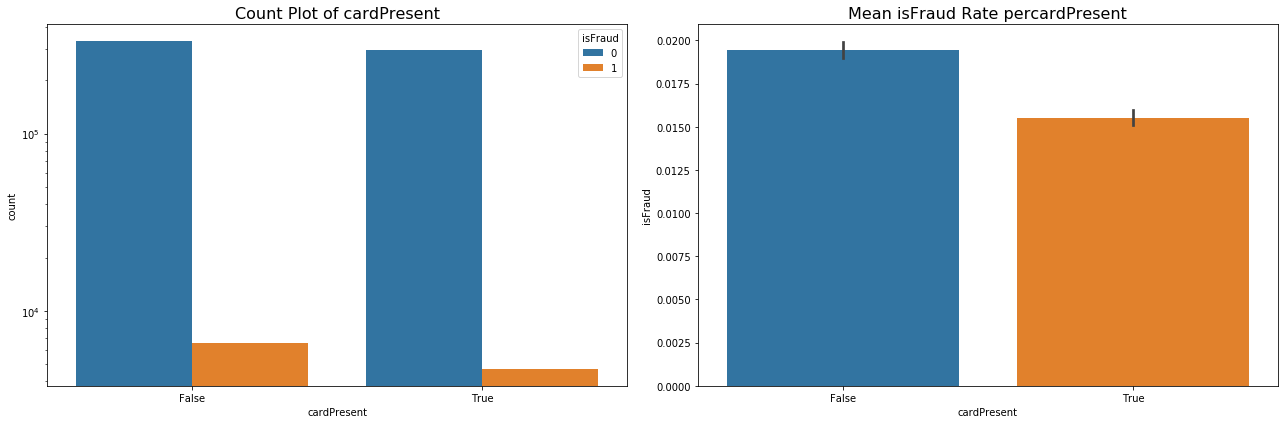

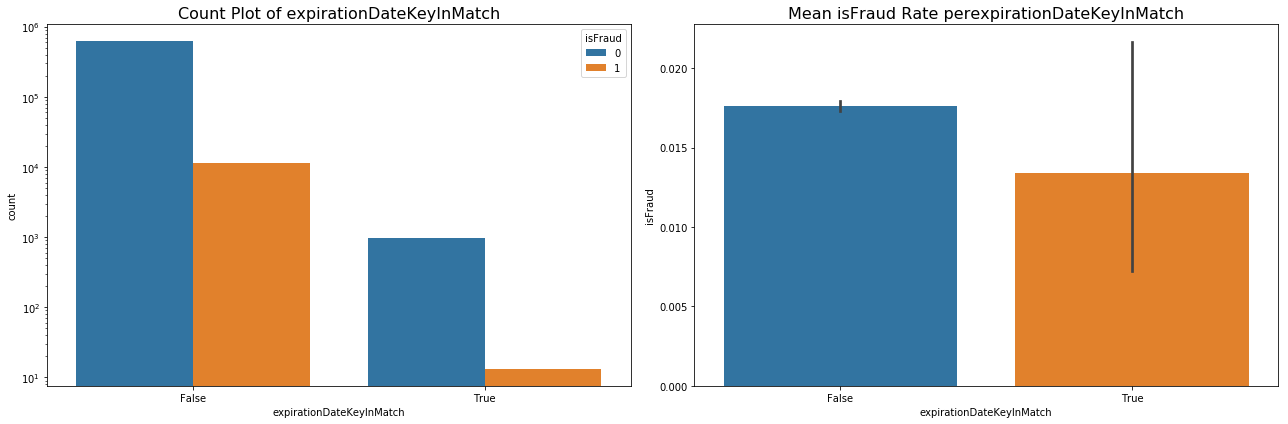

In [132]:
# Visualizations of boolean variables
bools = [x for x in data.columns if data[x].dtypes == np.bool and x != 'isFraud']

for var in bools:
    num_unique_values = data[var].nunique()
    
    if num_unique_values < 10:
        grouped = data[[var, 'isFraud']].groupby(var).mean().reset_index()

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
        sns.countplot(x=var, hue='isFraud', data=data, ax=ax[0])
        plot_title = 'Count Plot of ' + str(var)
        ax[0].set_title(plot_title, fontsize=16)
        ax[0].set_yscale('log')
        sns.barplot(x = var, y='isFraud', data=data, ax=ax[1])
        plot_title = 'Mean isFraud Rate per'  + str(var)
        ax[1].set_title(plot_title, fontsize=16)
        plt.tight_layout()
        plt.show()

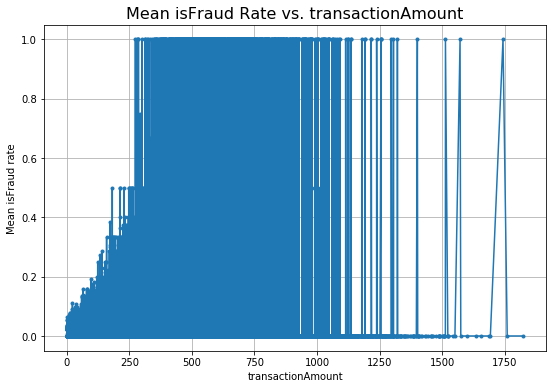

In [32]:
# Visualizations of numeric variables
grouped = data[['transactionAmount', 'isFraud']].groupby('transactionAmount').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
ax.plot(grouped['transactionAmount'], grouped['isFraud'], '.-')
ax.set_title('Mean isFraud Rate vs. transactionAmount', fontsize=16)
ax.set_xlabel('transactionAmount')
ax.set_ylabel('Mean isFraud rate')
ax.grid(True)
plt.show()

In [86]:
# Create card tenure in months variable
data['cardTenure'] = (pd.Timestamp.now() - data['accountOpenDate'])/np.timedelta64(1, 'M')

In [93]:
# Transform categorical variables to dummy variables for modeling
categoricals = [x for x in data.columns if data[x].dtypes == np.object and data[x].nunique()<10]
data = pd.get_dummies(data, columns = categoricals, drop_first=True )

In [94]:
data.columns

Index(['accountNumber', 'accountOpenDate', 'availableMoney', 'cardCVV',
       'cardLast4Digits', 'cardPresent', 'creditLimit', 'currentBalance',
       'currentExpDate', 'customerId', 'dateOfLastAddressChange', 'echoBuffer',
       'enteredCVV', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantCity', 'merchantName', 'merchantState',
       'merchantZip', 'posOnPremises', 'recurringAuthInd', 'transactionAmount',
       'transactionDateTime', 'cardTenure', 'acqCountry_MEX', 'acqCountry_PR',
       'acqCountry_US', 'merchantCountryCode_MEX', 'merchantCountryCode_PR',
       'merchantCountryCode_US', 'posConditionCode_08', 'posConditionCode_99',
       'posEntryMode_05', 'posEntryMode_09', 'posEntryMode_80',
       'posEntryMode_90', 'transactionType_PURCHASE',
       'transactionType_REVERSAL'],
      dtype='object')

In [95]:
X = data.loc[:, data.columns!= 'isFraud']
y = data.loc[:,'isFraud']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

In [159]:
data.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'enteredCVV', 'expirationDateKeyInMatch',
       'isFraud', 'merchantCategoryCode', 'merchantCountryCode',
       'merchantName', 'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionDateTime', 'transactionType', 'time_diff', 'multiSwipe'],
      dtype='object')

In [102]:
attributes = ['accountNumber', 'availableMoney', 
        'cardPresent', 'creditLimit', 'currentBalance',
        'customerId', 'expirationDateKeyInMatch', 'recurringAuthInd', 'transactionAmount',
        'cardTenure', 'acqCountry_MEX', 'acqCountry_PR',
       'acqCountry_US', 'merchantCountryCode_MEX', 'merchantCountryCode_PR',
       'merchantCountryCode_US', 'posConditionCode_08', 'posConditionCode_99',
       'posEntryMode_05', 'posEntryMode_09', 'posEntryMode_80',
       'posEntryMode_90', 'transactionType_PURCHASE',
       'transactionType_REVERSAL']
clf = RandomForestClassifier()
y_pred = clf.fit(X_train[attributes], y_train).predict_prob(X_test[attributes])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').